<a href="https://colab.research.google.com/github/nhuttran1356/CNN-/blob/main/fruit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Load data from folder
train_data = ImageDataGenerator(rescale=1./255,rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,brightness_range=[0.2,1.5], fill_mode="nearest") 
train_set = train_data.flow_from_directory('/content/drive/MyDrive/data_fruit/train',target_size = (100,100),batch_size = 40, class_mode = 'categorical')

test_data = ImageDataGenerator(rescale=1./255,rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,brightness_range=[0.2,1.5], fill_mode="nearest")
test_set = test_data.flow_from_directory('/content/drive/MyDrive/data_fruit/test',target_size = (100,100),batch_size = 40, class_mode = 'categorical')

Found 501 images belonging to 11 classes.
Found 132 images belonging to 11 classes.


In [4]:
train_set.class_indices

{'bơ': 0,
 'cam': 1,
 'chuối': 2,
 'dâu': 3,
 'dưa hấu': 4,
 'măng cụt': 5,
 'nho': 6,
 'óc chó': 7,
 'táo': 8,
 'thơm': 9,
 'xoài': 10}

In [5]:
#build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(11,activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 512)               1

In [8]:
#train model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("Training model")
history = model.fit(x = train_set, validation_data = test_set, epochs = 20, batch_size =64, verbose = 1)

Training model
Epoch 1/20
13/13 [==============================] - 4s 275ms/step - loss: 2.3881 - accuracy: 0.5010 - val_loss: 1.1263 - val_accuracy: 0.6212
Epoch 2/20
13/13 [==============================] - 3s 249ms/step - loss: 1.0098 - accuracy: 0.6567 - val_loss: 0.7830 - val_accuracy: 0.7273
Epoch 3/20
13/13 [==============================] - 3s 250ms/step - loss: 0.8933 - accuracy: 0.7246 - val_loss: 0.9012 - val_accuracy: 0.7121
Epoch 4/20
13/13 [==============================] - 3s 252ms/step - loss: 0.8006 - accuracy: 0.7006 - val_loss: 0.7309 - val_accuracy: 0.7045
Epoch 5/20
13/13 [==============================] - 3s 249ms/step - loss: 0.9241 - accuracy: 0.7305 - val_loss: 0.8290 - val_accuracy: 0.7652
Epoch 6/20
13/13 [==============================] - 3s 260ms/step - loss: 0.7718 - accuracy: 0.7385 - val_loss: 0.7192 - val_accuracy: 0.7348
Epoch 7/20
13/13 [==============================] - 3s 259ms/step - loss: 0.8017 - accuracy: 0.7385 - val_loss: 0.9563 - val_accuracy

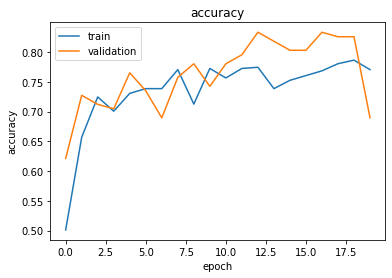

In [9]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

In [10]:
#save model after training
model.save('final_fruit.h5')

In [11]:
from keras.models import load_model
model =load_model('/content/drive/MyDrive/data_fruit/final_fruit.h5')

[2]
chuối


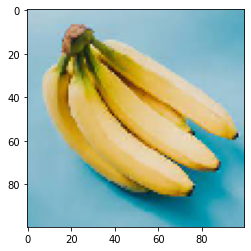

In [33]:
from keras.preprocessing.image import load_img,img_to_array
from keras_preprocessing import image
classes = ['bơ','cam','chuối','dâu','dưa hấu','măng cụt','nho','óc chó','táo','thơm','xoài']

test_image = image.load_img('/content/drive/MyDrive/data_fruit/test/chuối/download (9).jpg', target_size=(100, 100))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
result1 = np.argmax(result,axis = 1)
print(result1)
result1 = result[0]
for y in range(11):
    if result1[y] == 1.:
        break
prediction = classes[y]
print(prediction)

[1]
táo


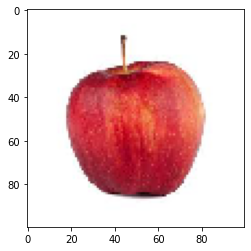

In [31]:
test_image2 = image.load_img('/content/drive/MyDrive/data_fruit/test/táo/tao2.jpg', target_size=(100, 100))
plt.imshow(test_image2)
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis=0)
result2 = model.predict(test_image2)
result3 = np.argmax(result,axis = 1)
print(result3)
result3 = result2[0]
for y in range(11):
    if result3[y] == 1.:
        break
prediction2 = classes[y]
print(prediction2)